# Facebook Live Sellers in Thailand Dataset

Source: The dataset is sourced from the UCI Machine Learning Repository


Questions

1. How does the time of upload (`status_published`)  affects the `num_reaction`?
2. Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?
3. Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.
4. Use the elbow method to find the optimum number of clusters.
5. What is the count of different types of posts in the dataset?
6. What is the average value of num_reaction, num_comments, num_shares for each post type?


Step by step do to these questions:

1. Loading the dataset and checking for missing values.
2. Analyzing the effect of upload time (status_published) on reactions (num_reactions).
3. Checking correlations between num_reactions, num_comments, and num_shares.
4. Performing K-Means clustering using status_type, num_reactions, num_comments, num_shares, and other engagement metrics.
5. Finding the optimal number of clusters using the elbow method.
6. Counting different post types (status_type).
7. Calculating the average reactions, comments, and shares per post type.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

# Load dataset
df = pd.read_csv("/content/Facebook_Marketplace_data.csv")

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [5]:
# Convert 'status_published' to datetime
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour  # Extract hour of posting

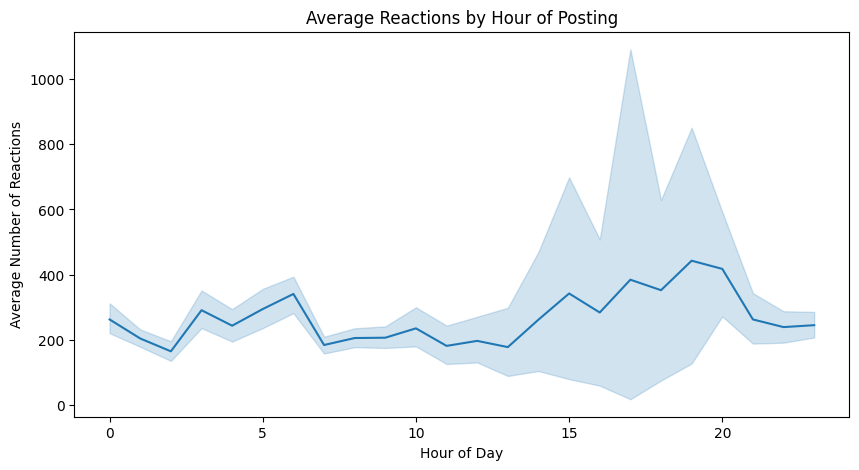

In [6]:
# Effect of time on num_reactions
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='hour', y='num_reactions', estimator='mean')
plt.title("Average Reactions by Hour of Posting")
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Reactions")
plt.show()

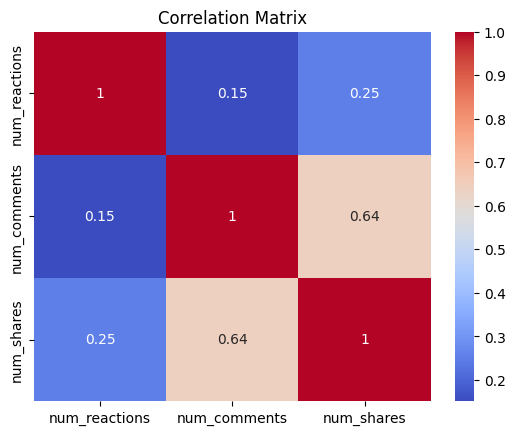

In [7]:
# Correlation matrix
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

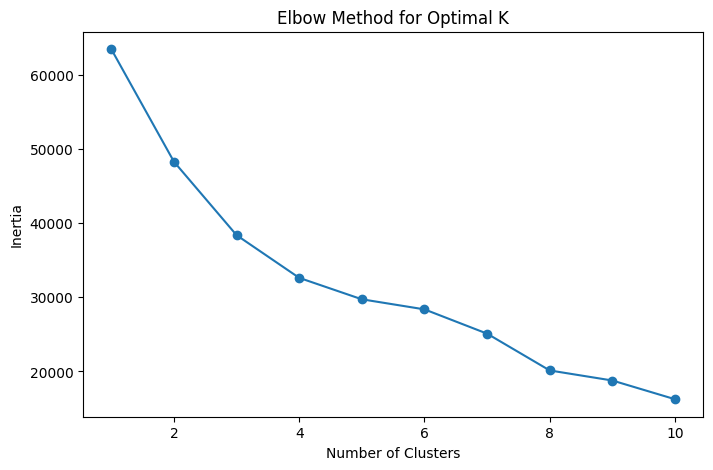

In [8]:
# K-Means Clustering
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features].fillna(0))

# Finding optimal k using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#Visualization
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [9]:
# Count of post types
print(df['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [10]:
# Average reactions, comments, and shares per post type
summary = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(summary)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
